In [1]:
from neural_implementation import neural_classification as nc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# UCITAVANJE PODATAKA I TESTIRANJE

df = pd.read_csv('../datasets/iris_extended.csv')
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [3]:
N = df.shape[0]
print(f'Ukupan broj podataka: {N}')

m = df.shape[1] - 1
print(f'Broj atributa svakog podatka: {m}')

attributes = list(df.drop('variety', axis=True).columns)
print(f'Atributi: {attributes}')

Ukupan broj podataka: 250
Broj atributa svakog podatka: 4
Atributi: ['sepal.length', 'sepal.width', 'petal.length', 'petal.width']


In [4]:
attr1 = 'petal.length'
attr2 = 'petal.width'
attributes = [attr1, attr2]
m = len(attributes)

N = df.shape[0]
print(f'Velicina skupa podataka: {N}')

Velicina skupa podataka: 250


In [5]:
classes = df['variety'].unique()
n_classes = len(classes)

print(f'Klase: {classes}')
print(f'Broj klasa: {n_classes}\n')

name_to_class_dict = dict(zip(classes, range(n_classes)))
class_to_name_dict = dict(zip(range(n_classes), classes))

print(f'Mapiranje imena klasa u numericke vrednosti:')
for name, cls in name_to_class_dict.items():
    print(f'{name} -> {cls}')

print()
print(f'Mapiranje numerickih vrednosti u odgovarajuce nazive klasa:')
for cls, name in class_to_name_dict.items():
    print(f'{cls} -> {name}')

Klase: ['Setosa' 'Versicolor' 'Virginica' 'Letosa' 'Helenica']
Broj klasa: 5

Mapiranje imena klasa u numericke vrednosti:
Setosa -> 0
Versicolor -> 1
Virginica -> 2
Letosa -> 3
Helenica -> 4

Mapiranje numerickih vrednosti u odgovarajuce nazive klasa:
0 -> Setosa
1 -> Versicolor
2 -> Virginica
3 -> Letosa
4 -> Helenica


In [6]:
mapper_cls_to_vec = {}
for i in range(n_classes):
    vec = np.zeros((n_classes,))
    vec[i] = 1
    
    mapper_cls_to_vec[i] = vec
    
print('Mapiranje numericke vrednosti u odgovarajuci vektor:')
for cls, vec in mapper_cls_to_vec.items():
    print(f'{cls} -> {vec}')

Mapiranje numericke vrednosti u odgovarajuci vektor:
0 -> [1. 0. 0. 0. 0.]
1 -> [0. 1. 0. 0. 0.]
2 -> [0. 0. 1. 0. 0.]
3 -> [0. 0. 0. 1. 0.]
4 -> [0. 0. 0. 0. 1.]


In [7]:
y_tmp = df['variety']

y = np.zeros((N, n_classes))
for i in range(N):
    cls = name_to_class_dict[y_tmp[i]]
    y[i] = mapper_cls_to_vec[cls]

In [8]:
X = np.ones((N, 2*m + 1))
X[:, 1] = df[attr1]
X[:, 2] = df[attr2]
X[:, 3] = df[attr1]**2
X[:, 4] = df[attr2]**2

In [9]:
print(f'Podaci:')
print(X[:10])
print(' ...')

print(f'Ciljne promenljive:')
print(y[:10])
print(' ...')

Podaci:
[[1.   1.4  0.2  1.96 0.04]
 [1.   1.4  0.2  1.96 0.04]
 [1.   1.3  0.2  1.69 0.04]
 [1.   1.5  0.2  2.25 0.04]
 [1.   1.4  0.2  1.96 0.04]
 [1.   1.7  0.4  2.89 0.16]
 [1.   1.4  0.3  1.96 0.09]
 [1.   1.5  0.2  2.25 0.04]
 [1.   1.4  0.2  1.96 0.04]
 [1.   1.5  0.1  2.25 0.01]]
 ...
Ciljne promenljive:
[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]
 ...


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify=y, 
                                                    test_size=0.4, 
                                                    random_state=5)

In [11]:
print(f'X_train:')
print(X_train[:10])
print(' ...')
print()

print(f'y_train:')
print(y_train[:10])
print(' ...')
print()

print(f'X_test:')
print(X_test[:10])
print(' ...')
print()

print(f'y_test:')
print(y_test[:10])
print(' ...')

X_train:
[[1.000e+00 1.400e+00 2.000e-01 1.960e+00 4.000e-02]
 [1.000e+00 4.500e+00 1.500e+00 2.025e+01 2.250e+00]
 [1.000e+00 5.500e+00 1.800e+00 3.025e+01 3.240e+00]
 [1.000e+00 4.400e+00 1.200e+00 1.936e+01 1.440e+00]
 [1.000e+00 1.700e+00 5.000e-01 2.890e+00 2.500e-01]
 [1.000e+00 1.400e+00 2.000e-01 1.960e+00 4.000e-02]
 [1.000e+00 2.600e+00 1.500e+00 6.760e+00 2.250e+00]
 [1.000e+00 5.500e+00 1.800e+00 3.025e+01 3.240e+00]
 [1.000e+00 4.800e+00 1.800e+00 2.304e+01 3.240e+00]
 [1.000e+00 1.100e+00 1.000e-01 1.210e+00 1.000e-02]]
 ...

y_train:
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]]
 ...

X_test:
[[1.000e+00 6.000e+00 1.000e+00 3.600e+01 1.000e+00]
 [1.000e+00 5.000e+00 7.000e-01 2.500e+01 4.900e-01]
 [1.000e+00 2.600e+00 1.300e+00 6.760e+00 1.690e+00]
 [1.000e+00 1.600e+00 2.000e-01 2.560e+00 4.000e-02]
 [1.000e+00 4.700e+00 1.100e+00 2.209e

In [12]:
nn = nc.NeuralNetwork(2*m, [3*m], n_classes)

nn.print_network()
print()

nn.print_layer_mapper_sizes()
print()

print('Initial model:')
nn.print_model()

~ Neural network ~
Layer 1:
[1. 1. 1. 1. 1.]
Layer 2:
[1. 1. 1. 1. 1. 1. 1.]
Layer 3:
[1. 1. 1. 1. 1.]

Dimenzije matrica modela koji mapiraju slojeve:
0 -> 1: 6 x 5
1 -> 2: 5 x 7

Initial model:
Model:
W_0: 0 -> 1
[[-0.05836535  0.02436203 -0.04906601  0.06482071 -0.09119757]
 [ 0.0243445  -0.02798128 -0.04077608  0.04998993  0.08941528]
 [ 0.04337067  0.07422797 -0.01775161 -0.04427937 -0.09440114]
 [ 0.09177818  0.09825028 -0.06780894  0.07903445 -0.06917626]
 [-0.0942316  -0.06094864  0.00487548  0.00649435 -0.00020762]
 [ 0.02669824 -0.0828177   0.02129086  0.07584793 -0.0496075 ]]
W_1: 1 -> 2
[[-0.09666425 -0.06128758  0.04577081 -0.04216238 -0.08385929  0.02081899
  -0.09038054]
 [ 0.04241695 -0.03764495 -0.05049151  0.05666422 -0.06156461  0.05876117
  -0.07508603]
 [ 0.07095271  0.00762878  0.07955247 -0.02118433 -0.07776893 -0.08466553
   0.02830599]
 [-0.04582905  0.09946456 -0.05648837  0.0389568   0.04136683  0.0574687
  -0.00632452]
 [-0.02675636  0.03211596  0.00126918  

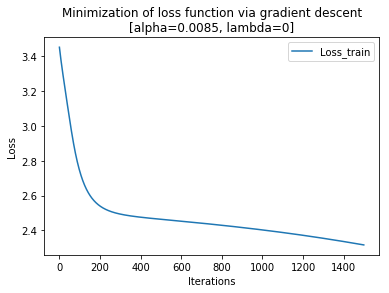

Trained model:
Model:
W_0: 0 -> 1
[[ 0.05998678 -0.05411545 -0.0653      0.10709527 -0.04933846]
 [ 0.0174372   0.18578825  0.00674448  0.2472164  -0.01698682]
 [ 0.00102362 -0.08544127 -0.11501026  0.12392077 -0.03706333]
 [-0.00299123 -0.08927141 -0.01853507  0.13636782 -0.00574598]
 [ 0.28985478  0.28939134  0.24755737 -0.19937855  0.12800101]
 [-0.04621167 -0.07550753  0.12517179  0.16054525  0.05247247]]
W_1: 1 -> 2
[[-0.063767   -0.34701621 -0.37518758 -0.45175853 -0.38157936  0.59756429
  -0.58357957]
 [-0.55203344 -0.17531064 -0.1368761  -0.18888799 -0.06925484 -0.34341859
  -0.23226447]
 [-0.61595474 -0.10228923 -0.29208568 -0.02221717 -0.0265911  -0.6023778
  -0.10108669]
 [-0.28079227 -0.40063416 -0.29936675 -0.35605869 -0.32098627  0.32829998
  -0.17306232]
 [-0.55369646 -0.01744345 -0.36275117 -0.0172264  -0.1349471  -0.52951152
  -0.10213152]]

~ Neural network ~
Layer 1:
[ 1.    4.6   1.4  21.16  1.96]
Layer 2:
[1.         0.86869705 0.99771367 0.88046875 0.91947405 0.11

In [13]:
clf = nn.fit(X_train, 
             y_train, 
             alpha=0.0085, 
             num_iter=1500,
             plot=True, 
             gc_it=100, 
             gc_log_path='./gc_test2.txt')

print('Trained model:')
clf.print_model()
print()

nn.print_network()

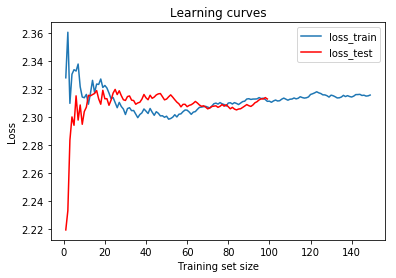

In [14]:
nc.plot_learning_curves(X_train, y_train, X_test, y_test, clf)

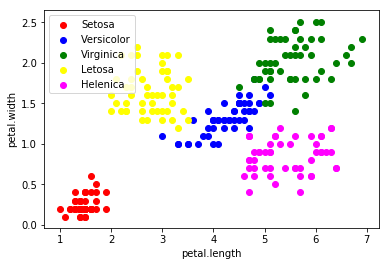

In [15]:
colors = ['red', 'blue', 'green', 'yellow', 'magenta']
for c, cls in zip(colors, classes):
    subsample = df.loc[df['variety'] == cls]
    plt.scatter(subsample[attr1], subsample[attr2], color=c)

plt.xlabel(attr1)
plt.ylabel(attr2)

plt.legend(classes)

In [16]:
x1 = np.array([1, 0.5, 0.4, 0.5**2, 0.4**2]) # Setosa
x2 = np.array([1, 4.2, 1.2, 4.2**2, 1.2**2]) # Versicolor
x3 = np.array([1, 5.5, 2, 5.5**2, 2**2]) # Virginca
x4 = np.array([1, 2.9, 1.9, 2.9**2, 1.9**2]) # Letosa
x5 = np.array([1, 5.2, 0.8, 5.2**2, 0.8**2]) # Helenica

In [17]:
y_predict1 = clf.predict(x1)
y_predict2 = clf.predict(x2)
y_predict3 = clf.predict(x3)
y_predict4 = clf.predict(x4)
y_predict5 = clf.predict(x5)

print('~ TESTIRANJE KLASIFIKATORA ~')

print('Test 1:')
nc.Classifier.prediction_info(y_predict1, class_to_name_dict)
print()

print('Test 2:')
nc.Classifier.prediction_info(y_predict2, class_to_name_dict)
print()

print('Test 3:')
nc.Classifier.prediction_info(y_predict3, class_to_name_dict)
print()

print('Test 4:')
nc.Classifier.prediction_info(y_predict4, class_to_name_dict)
print()

print('Test 5:')
nc.Classifier.prediction_info(y_predict5, class_to_name_dict)
print() 

~ TESTIRANJE KLASIFIKATORA ~
Test 1:
Prediction vector: [0.31602811 0.23650294 0.21811051 0.29736144 0.22862038]
Max prediction value: 0.3160281070829708 (at position 0)
Class: Setosa

Test 2:
Prediction vector: [0.1325502  0.20898406 0.22531802 0.16874249 0.22236897]
Max prediction value: 0.22531801507534865 (at position 2)
Class: Virginica

Test 3:
Prediction vector: [0.10743519 0.20685761 0.23580343 0.14644781 0.23084789]
Max prediction value: 0.23580342908505747 (at position 2)
Class: Virginica

Test 4:
Prediction vector: [0.21548106 0.20645665 0.19394099 0.23227979 0.19700618]
Max prediction value: 0.2322797891200141 (at position 3)
Class: Letosa

Test 5:
Prediction vector: [0.10847241 0.20805217 0.23686163 0.14739252 0.23195565]
Max prediction value: 0.2368616307060637 (at position 2)
Class: Virginica

